 y = 0. It's a non-cat


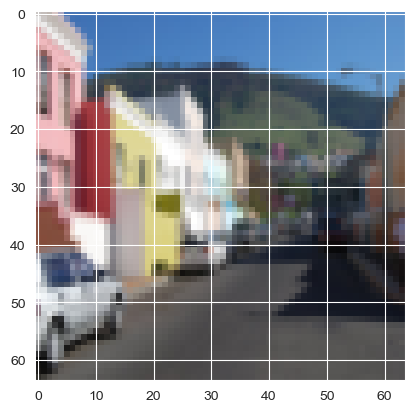

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons

import h5py
import imageio
from PIL import Image
from utils import * # image processing functions from utils.py


train_X_origin, train_y , test_X_origin, test_y, classes = load_data()

index = 1
plt.imshow(train_X_origin[index])

print(f" y = {train_y[0,index]}. It's a {classes[train_y[0,index]].decode('utf-8')}")



In [23]:
print(f"number of training examples : {train_X_origin.shape[0]}")
print(f"number of text examples : {test_X_origin.shape[0]}")

print(f"number of features : {train_X_origin.shape[2]}")

print(f"height of the image : {train_X_origin.shape[1]}")
print(f"width of the image : {train_X_origin.shape[2]}")

number of training examples : 209
number of text examples : 50
number of features : 64
height of the image : 64
width of the image : 64


In [28]:
# Reshape the images for neural networks!! 
train_x_flatten = train_X_origin.reshape(train_X_origin.shape[0], -1)
test_x_flatten = test_X_origin.reshape(test_X_origin.shape[0], -1)

print (f'train_x\'s shape: {train_x_flatten.shape}')
print (f'test_x\'s shape: {test_x_flatten.shape}')


train_x's shape: (209, 12288)
test_x's shape: (50, 12288)


In [29]:
# Preprocessing -> min - Max Standardise 

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255


training accuracy: 1.0
test accuracy: 0.72
50
50


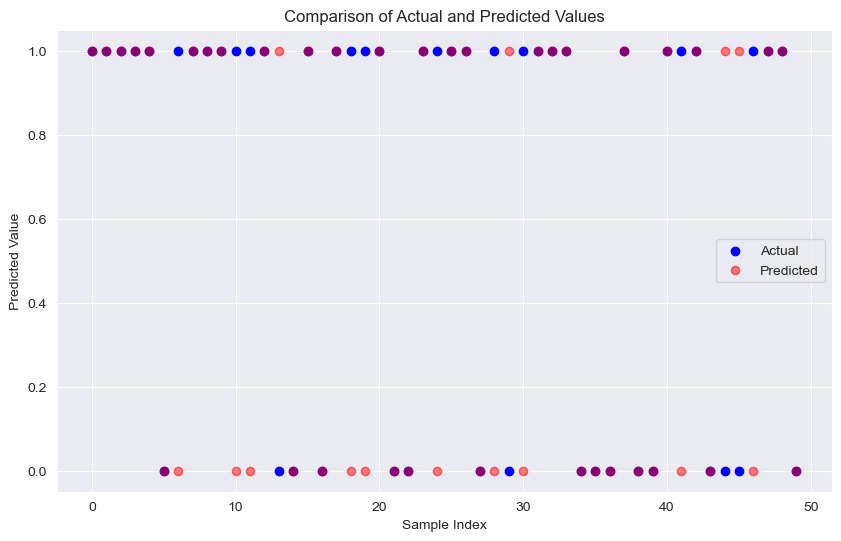

In [57]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_x, train_y.flatten())

print(f"training accuracy: {logreg.score(train_x, train_y.flatten())}")
print(f"test accuracy: {logreg.score(test_x, test_y.flatten())}")

predictions = logreg.predict(test_x)

test_y = test_y.flatten()

print(len(test_y))
print(len(predictions))

import matplotlib.pyplot as plt
# 실제 레이블 과 예측 레이블 을 비교 하여 시각화
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_y)), test_y, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', alpha=0.5, label='Predicted')

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()


In [66]:
neural_network_clf = MLPClassifier( hidden_layer_sizes=(64),
                                   activation='relu', solver='sgd',
                                   alpha =0,
                                   learning_rate_init=1e-3,
                                   max_iter= 1000,
                                   n_iter_no_change= 25,
                                   random_state=1 )

neural_network_clf.fit(train_x, train_y.flatten()) 

MLPClassifier(alpha=0, hidden_layer_sizes=64, max_iter=1000,
              n_iter_no_change=25, random_state=1, solver='sgd')

number of neurons: 64
Training accuracy: 1.0
Test accuracy : 0.76


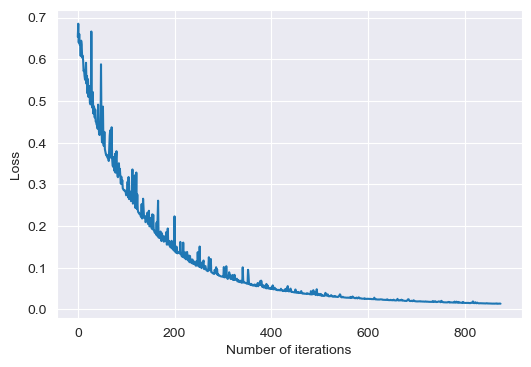

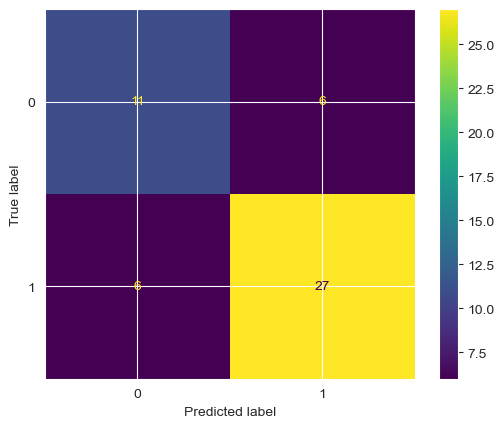

In [72]:
fig, ax = plt.subplots(figsize=(6, 4))

print(f"number of neurons: {neural_network_clf.hidden_layer_sizes}")

ax.plot(neural_network_clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')


print(f"Training accuracy: {neural_network_clf.score(train_x, train_y.flatten())}")
print(f"Test accuracy : {neural_network_clf.score(test_x, test_y.flatten())}")

ConfusionMatrixDisplay.from_estimator(neural_network_clf,test_x, test_y.flatten())



In [73]:
alphas = np.logspace(-3,0,100)
learning_rates = np.logspace(-4,-2,100)

#10^-3부터 10^0(즉, 0.001부터 1)까지 100개의 값(alphas)을 생성하고, 10^-4부터 10^-2(즉, 0.0001부터 0.01)까지 100개의 값(learning_rates)을 생성.

# regularization parameter (alpha)와 학습률(learning_rate_init)에 대한 하이퍼파라미터 값의 범위 지정

parameters ={'learning_rate_init': learning_rates , 'alpha': alphas }

nn = MLPClassifier(hidden_layer_sizes=(64),
                   activation='relu',
                   solver='sgd',
                   max_iter=1000,
                   n_iter_no_change=25,
                   random_state=1)

clf = RandomizedSearchCV(nn,parameters, scoring= 'accuracy', n_iter= 10, cv=3, verbose=2)

#andomizedSearchCV: MLPClassifier 모델(nn)에 대한 하이퍼파라미터 무작위 탐색을 구성합니다. parameters는 탐색할 하이퍼파라미터, scoring='accuracy'는 모델의 성능을 평가할 기준으로 정확도를 사용, n_iter=10은 10개의 하이퍼파라미터 조합을 무작위로 선택, cv=3은 3-폴드 교차 검증을 의미합니다. verbose=2는 탐색 과정 중에 더 상세한 출력을 얻기 위한 설정입니다.


clf.fit(train_x, train_y.flatten())

clf.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END alpha=0.007054802310718645, learning_rate_init=0.000774263682681127; total time=  21.6s
[CV] END alpha=0.007054802310718645, learning_rate_init=0.000774263682681127; total time=  21.0s
[CV] END alpha=0.007054802310718645, learning_rate_init=0.000774263682681127; total time=  21.1s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.9326033468832199, learning_rate_init=0.0003511191734215131; total time=  25.8s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.9326033468832199, learning_rate_init=0.0003511191734215131; total time=  28.1s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.9326033468832199, learning_rate_init=0.0003511191734215131; total time=  27.5s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.26560877829466867, learning_rate_init=0.00025353644939701115; total time=  27.9s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.26560877829466867, learning_rate_init=0.00025353644939701115; total time=  25.8s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.26560877829466867, learning_rate_init=0.00025353644939701115; total time=  26.8s
[CV] END alpha=0.004977023564332114, learning_rate_init=0.0006734150657750821; total time=  18.4s
[CV] END alpha=0.004977023564332114, learning_rate_init=0.0006734150657750821; total time=  20.2s
[CV] END alpha=0.004977023564332114, learning_rate_init=0.0006734150657750821; total time=  20.6s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.26560877829466867, learning_rate_init=0.00011497569953977356; total time=  27.4s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.26560877829466867, learning_rate_init=0.00011497569953977356; total time=  26.2s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.26560877829466867, learning_rate_init=0.00011497569953977356; total time=  27.6s
[CV] END alpha=0.37649358067924676, learning_rate_init=0.001873817422860385; total time=  13.8s
[CV] END alpha=0.37649358067924676, learning_rate_init=0.001873817422860385; total time=  15.0s
[CV] END alpha=0.37649358067924676, learning_rate_init=0.001873817422860385; total time=  14.7s
[CV] END alpha=0.06579332246575682, learning_rate_init=0.000509413801481638; total time=  26.8s
[CV] END alpha=0.06579332246575682, learning_rate_init=0.000509413801481638; total time=  29.7s
[CV] END alpha=0.06579332246575682, learning_rate_init=0.000509413801481638; total time=  30.6s
[CV] END alpha=0.12328467394420659, learning_rate_init=0.0021544346900318843; total time=  11.9s
[CV] END alpha=0.12328467394420659, learning_rate_init=0.0021544346900318843; total time=  19.5s
[CV] END alpha=0.12328467394420659, learning_rate_init=0.0021544346900318843; total time=  32.9s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.24770763559917114, learning_rate_init=0.0001; total time=  48.3s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.24770763559917114, learning_rate_init=0.0001; total time=  31.4s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.24770763559917114, learning_rate_init=0.0001; total time=  27.1s
[CV] END alpha=0.32745491628777285, learning_rate_init=0.007564633275546291; total time=   7.9s
[CV] END alpha=0.32745491628777285, learning_rate_init=0.007564633275546291; total time=   7.5s
[CV] END alpha=0.32745491628777285, learning_rate_init=0.007564633275546291; total time=   7.4s


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'learning_rate_init': 0.00025353644939701115, 'alpha': 0.26560877829466867}

In [78]:
neural_network_clf = MLPClassifier( hidden_layer_sizes=(64),
                                    activation='relu', solver='sgd',
                                    alpha =0.26560877829466867,
                                    learning_rate_init=0.00025353644939701115,
                                    max_iter= 500,
                                    n_iter_no_change= 25,
                                    random_state=1 )

neural_network_clf.fit(train_x, train_y.flatten())

print(f"Updated Training accuracy: {neural_network_clf.score(train_x, train_y.flatten())}")
print(f"Updated Test accuracy : {neural_network_clf.score(test_x, test_y.flatten())}")


Updated Training accuracy: 0.9569377990430622
Updated Test accuracy : 0.76


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
